<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana4/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El *teorema del límite central* establece que la **distribución de la suma** de un número grande* de ***variables iid*** será aproximadamene **normal**, sin importar la distribución subyacente


## Bibliotecas

In [42]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [11]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras

    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [12]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [13]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista,
  por ejemplo:   autor, titulo y otros elementos'''

  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [14]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes

  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [15]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n])

  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama

  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [16]:
def genera_muestras_de_texto(texto, grado=0,
                             num_muestras=100,
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [17]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [18]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana (altura de hombres adultos)

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [26]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 800 # tamaño de la muestra
m = 2000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,1653.637793,1659.550964,1705.148983,1642.954772,1752.858695,1779.928391,1737.551038,1682.786131,1725.100730,1582.870082,...,1715.942291,1634.507077,1524.630384,1703.937326,1640.204208,1812.359307,1688.354286,1655.846994,1637.574163,1666.288591
1,1644.501623,1717.467169,1693.062313,1671.055156,1574.946005,1699.487374,1657.018855,1625.955525,1724.345218,1615.660022,...,1615.198054,1719.091769,1704.184949,1632.682072,1627.501869,1694.293198,1746.384925,1709.858893,1610.985930,1540.242742
2,1578.998014,1774.583646,1619.148018,1724.902297,1724.856932,1683.952067,1680.016591,1636.023466,1619.287770,1655.867294,...,1781.531076,1670.839926,1683.841813,1787.112579,1556.533580,1623.469363,1616.702521,1620.292643,1738.959713,1669.522975
3,1689.402959,1710.997028,1604.339554,1666.434813,1619.573216,1768.162218,1656.617442,1646.478332,1662.175444,1626.021328,...,1615.421910,1701.970821,1751.832197,1726.808433,1716.068229,1659.166306,1621.158700,1703.914622,1677.817012,1726.018638
4,1573.303404,1761.556865,1575.161773,1709.505368,1712.479659,1638.627912,1670.299080,1695.307133,1641.345070,1704.844370,...,1681.544152,1493.219953,1587.065670,1653.051270,1608.882570,1672.508601,1666.581817,1557.493467,1632.676816,1631.303339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1678.882709,1750.406736,1656.790138,1729.207548,1692.619773,1727.655993,1569.903325,1600.968117,1577.980924,1654.456914,...,1569.278529,1690.828853,1753.812102,1710.314619,1658.007464,1579.144416,1688.502765,1658.861336,1613.764086,1641.024763
796,1573.789870,1703.384564,1690.368880,1654.500640,1761.242312,1629.412831,1700.960707,1558.598423,1798.747123,1743.652627,...,1652.928686,1643.292806,1692.138538,1649.371604,1630.487335,1748.696885,1655.648037,1775.774398,1764.946052,1698.052847
797,1543.421448,1591.217593,1660.108814,1731.818651,1652.720160,1652.372271,1596.422791,1686.323955,1589.502238,1747.447391,...,1712.477623,1703.467566,1762.148967,1635.164773,1760.461811,1687.764577,1569.724224,1700.891446,1585.505352,1729.040259
798,1655.288505,1720.281249,1628.964817,1622.793318,1562.231243,1708.747746,1651.457995,1613.923903,1643.122566,1719.687225,...,1611.802116,1619.765468,1685.117523,1682.962575,1663.546006,1684.340927,1660.008889,1578.103157,1657.842101,1696.299382


<h2> Distribución de cada muestra

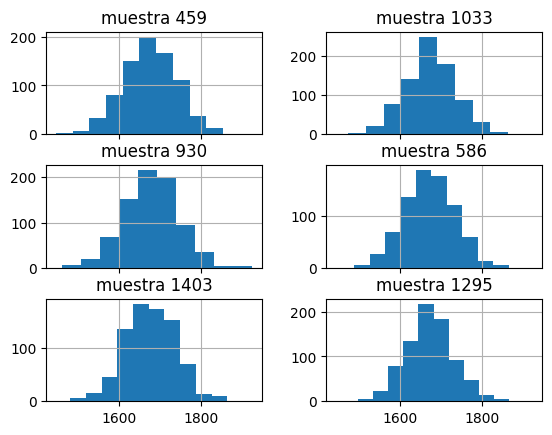

In [27]:
alturas_hombres.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2> Distribución de la suma

In [21]:
suma = alturas_hombres.sum()
suma

,0
muestra 1,671990.303285
muestra 2,669095.230369
muestra 3,669903.507126
muestra 4,670810.325189
muestra 5,669520.036156
...,...
muestra 1996,670281.535540
muestra 1997,670150.100938
muestra 1998,669696.112950
muestra 1999,669843.678028


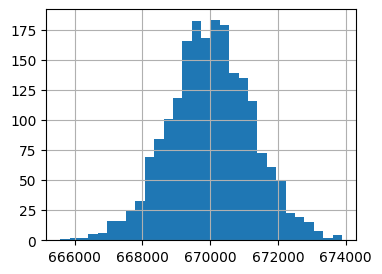

In [22]:
suma.hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los promedios

In [28]:
medias = alturas_hombres.mean()
medias

,0
muestra 1,1677.011653
muestra 2,1678.495083
muestra 3,1675.351947
muestra 4,1673.952046
muestra 5,1672.604277
...,...
muestra 1996,1675.123375
muestra 1997,1678.886803
muestra 1998,1673.398963
muestra 1999,1675.163723


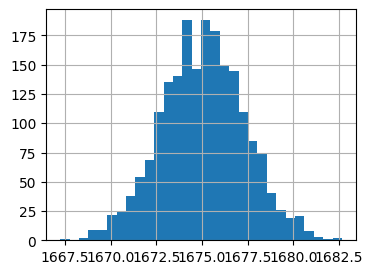

In [29]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

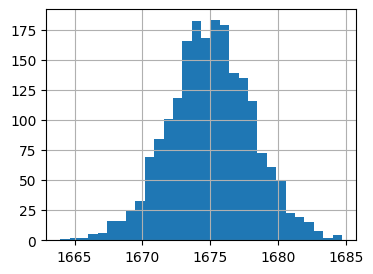

In [25]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los errores

In [30]:
errores = mu - medias
errores

,0
muestra 1,-2.011653
muestra 2,-3.495083
muestra 3,-0.351947
muestra 4,1.047954
muestra 5,2.395723
...,...
muestra 1996,-0.123375
muestra 1997,-3.886803
muestra 1998,1.601037
muestra 1999,-0.163723


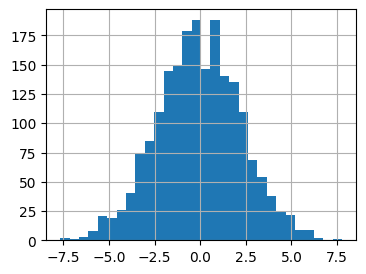

In [31]:
errores.hist(bins=30, figsize=(4,3))
plt.show()

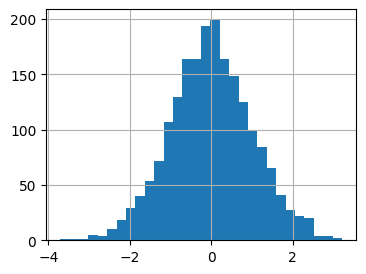

In [ ]:
# podemos llegar a la distribución normal estándar
(errores/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()

# Distribución Bernoulli (Agujas de Buffon)

<h2> Obtener muestras

In [43]:
def cruce_agujas_Buffon(n):
    l = 1
    l_cuadrado = 10

    x = np.random.uniform(0, l_cuadrado, n) # coordenada x del centro de la aguja
    y = np.random.uniform(0, l_cuadrado, n) # cordenada y del centro del aguja
    𝜃 = np.random.uniform(0, np.pi, n) # angulo de rotación de la aguja en radianes, entre 0 y pi (180 grados)

    # Calcula coordenadas extremos (P1 y P2)
    x1 = x - (1/2 * np.cos(𝜃))
    y1 = y - (1/2 * np.sin(𝜃))

    x2 = x + (1/2 * np.cos(𝜃))
    y2 = y + (1/2 * np.sin(𝜃))

    # ¿Cruza alguna de las lineas del tapete?
    cruza = np.where(np.floor(y1) != np.floor(y2), 1, 0)    # np.floor(3.76) = 3

    return cruza

In [46]:
n = 3408 # tamaño de la muestra
m = 2000 # número de muestras
Buffon_df= pd.DataFrame.from_dict({'experimento '+str(i): cruce_agujas_Buffon(n) for i in range(1, m+1)})
Buffon_df

,experimento 1,experimento 2,experimento 3,experimento 4,experimento 5,experimento 6,experimento 7,experimento 8,experimento 9,experimento 10,...,experimento 1991,experimento 1992,experimento 1993,experimento 1994,experimento 1995,experimento 1996,experimento 1997,experimento 1998,experimento 1999,experimento 2000
0,1,1,1,0,1,1,0,0,1,1,...,0,1,0,0,0,1,1,1,1,1
1,1,1,1,1,0,0,1,0,1,0,...,1,1,1,0,1,1,1,1,0,1
2,0,0,1,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,0,1,1
3,1,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,0
4,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,1,1,1,1,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,0,0
3404,1,1,0,1,0,1,1,1,1,0,...,1,0,1,0,1,1,1,0,1,1
3405,0,1,1,1,0,1,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
3406,0,0,0,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0


<h2> Distribución de cada muestra

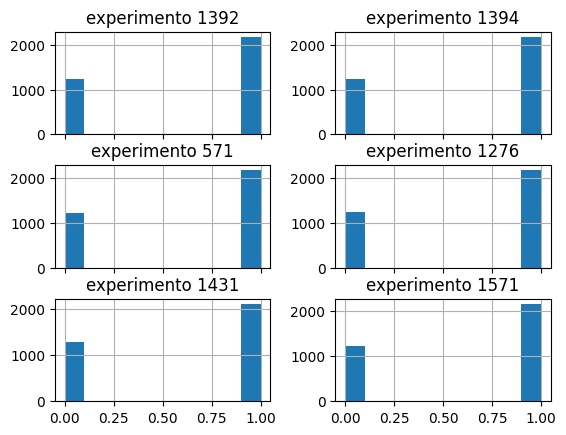

In [47]:
Buffon_df.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2>Distribución de la suma

In [48]:
suma = Buffon_df.sum()
suma

,0
experimento 1,2210
experimento 2,2190
experimento 3,2182
experimento 4,2167
experimento 5,2135
...,...
experimento 1996,2170
experimento 1997,2147
experimento 1998,2165
experimento 1999,2187


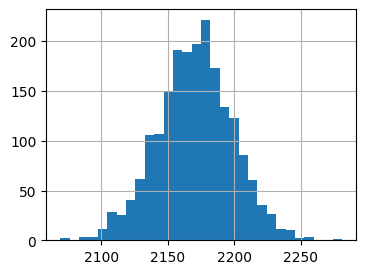

In [49]:
suma.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

In [50]:
medias = Buffon_df.mean()
medias

,0
experimento 1,0.648474
experimento 2,0.642606
experimento 3,0.640258
experimento 4,0.635857
experimento 5,0.626467
...,...
experimento 1996,0.636737
experimento 1997,0.629988
experimento 1998,0.635270
experimento 1999,0.641725


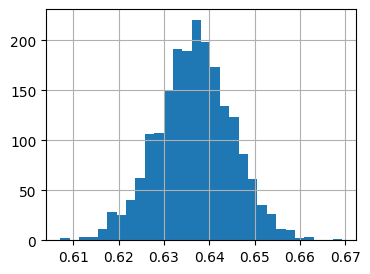

In [51]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

In [52]:
errores = 2/np.pi - medias
errores

,0
experimento 1,-0.011854
experimento 2,-0.005986
experimento 3,-0.003638
experimento 4,0.000763
experimento 5,0.010153
...,...
experimento 1996,-0.000117
experimento 1997,0.006632
experimento 1998,0.001350
experimento 1999,-0.005106


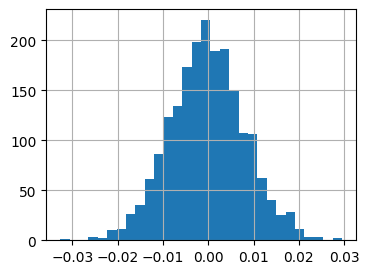

In [53]:
errores.hist(bins=30, figsize=(4,3))
plt.show()

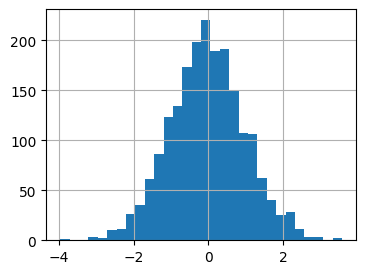

In [54]:
# podemos llegar a la distribución normal estándar
var = (2/np.pi)*(1-(2/np.pi))     # var = p(1-p)
sigma = np.sqrt(var)

(errores/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()

# Distribución Bernoulli (obtener una vocal)

<h2> Preprocesar libro y obtener probabilidades de los caracteres

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez',
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)
libro_limpio = limpiar_texto(libro)

In [57]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

0.38405272562528125

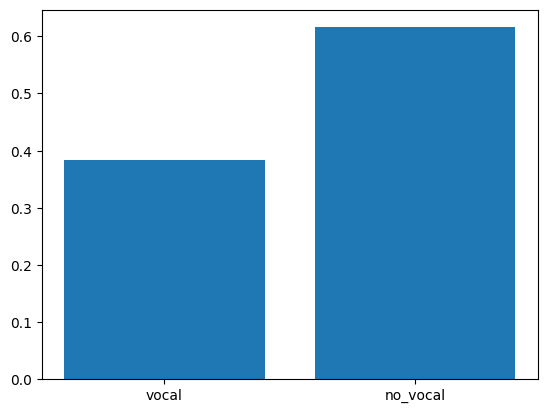

In [58]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

<h2> Obtener muestras

In [59]:
%%time
n = 400 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 30.1 s, sys: 22.3 ms, total: 30.1 s
Wall time: 33.7 s


In [60]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,dadan eepeau abagt eseat ca qee t iinfnsmsmoed...,171,0.4275,-0.043447
muestra_2,al elusst eaeeo qnptmo ohsesrrsoicossasamedaia...,140,0.3500,0.034053
muestra_3,aaeo autd pacaxr lesaea aaus nneaul raeo m...,164,0.4100,-0.025947
muestra_4,blaclruiazrvuse rsvuaesc snt nepmraepls crapl...,148,0.3700,0.014053
muestra_5,a ien nqoapc rm aeesscseoaalalrecleelqooexsn...,151,0.3775,0.006553


<h2> Distribución de la suma

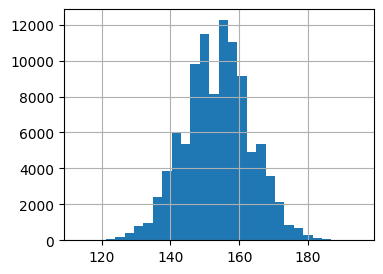

In [61]:
muestras['vocales'].hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los promedios

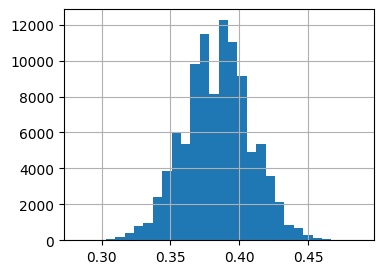

In [62]:
muestras['p_estimada'].hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

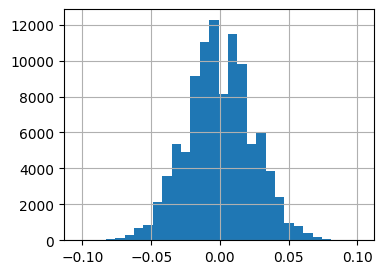

In [63]:
muestras['errores'].hist(bins=30, figsize=(4,3))
plt.show()

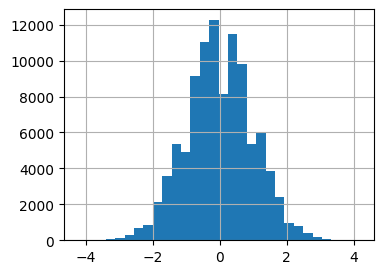

In [64]:
# podemos llegar a la distribución normal estandar
sigma = np.sqrt(p*(1-p))
(muestras['errores']/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()


# Distribución exponencial (carácteres antes de que salga n)

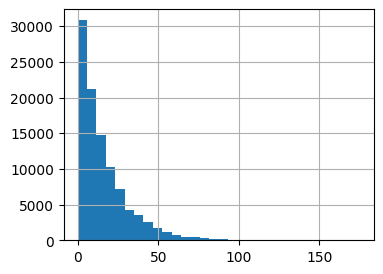

In [65]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n)
X.hist(bins=30, figsize=(4,3))
plt.show()

In [71]:
X.mean()  #  1 / λ

15.76074

En la [distribución exponencial](https://en.wikipedia.org/wiki/Exponential_distribution)

$$ \mu = \cfrac{1}{\lambda}$$

$$ \sigma^2 = \cfrac{1}{\lambda^{2}}$$



In [74]:
sigma = X.mean()

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

<h2> Obtener muestras

In [75]:
n = 400 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,0,21,1,7,26,11,21,14,34,17,...,1,14,23,17,8,1,41,14,36,10
1,93,31,2,9,20,16,31,14,0,8,...,10,44,1,15,11,33,32,74,1,26
2,8,11,1,45,6,11,0,11,6,4,...,46,19,33,8,0,13,2,53,15,19
3,16,26,0,3,44,3,30,13,22,9,...,19,16,3,5,6,12,5,41,10,9
4,7,3,0,29,25,49,30,7,6,8,...,0,20,17,17,27,11,24,78,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,22,18,12,12,17,3,21,0,24,...,3,35,2,40,0,11,33,4,29,11
396,1,14,19,34,34,21,1,3,12,4,...,20,4,6,23,18,0,0,15,1,28
397,15,7,23,80,3,2,43,1,3,42,...,1,52,23,22,6,8,35,14,5,26
398,0,20,3,3,0,16,29,30,26,0,...,54,12,8,5,7,11,24,28,24,1


<h2> Distribución de cada muestra

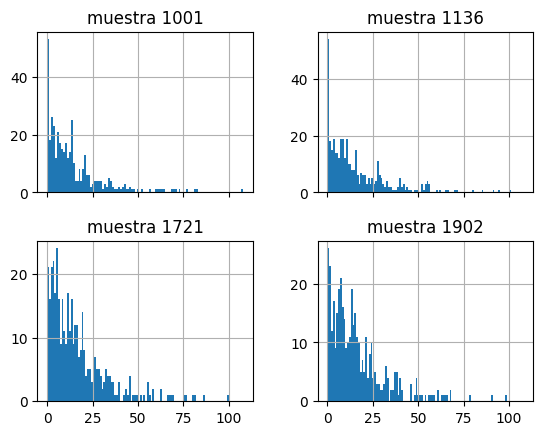

In [76]:
muestras_exp.sample(4, axis = 1).hist(sharex= True, bins=100)
plt.show()

<h2>Distribución de la suma

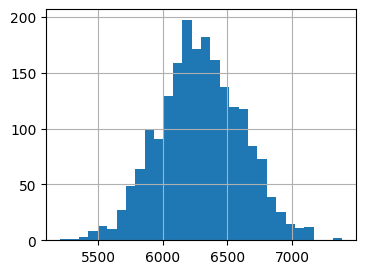

In [77]:
muestras_exp.sum().hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

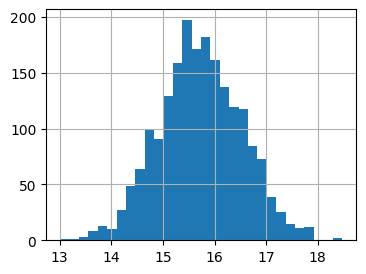

In [78]:
muestras_exp.mean().hist(bins=30, figsize=(4,3))
plt.show()


<h2>Distribución de los errores

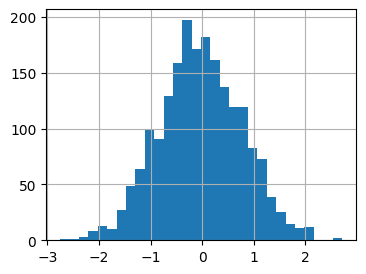

In [79]:
errores = muestras_exp.mean() - X.mean()
errores.hist(bins=30, figsize=(4,3))
plt.show()

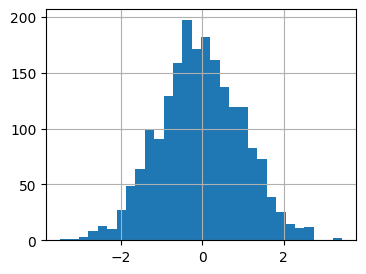

In [80]:
# podemos llegar a la distribución normal estándar

(errores/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

